# Life Expectancy (WHO) Analysis and Prediction:

The objective of this analysis is to use regression and classification models to examine the factors affecting life expectancy across countries. Specifically, we aim to:

1. **Predict Life Expectancy**: Use regression models to estimate life expectancy based on various health, economic, and demographic features.

2. **Classify Development Status**: Use classification models to categorize countries as "developed" or "developing," analyzing the characteristics associated with each category.

Through this dual approach, we seek to gain insights into the determinants of life expectancy and support targeted public health strategies, with model performance evaluated by R² for regression and F1 score for classification.

### 1. Initial Exploration and Pre-Processing

#### 1.1 Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/Life%20Expectancy%20Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.shape

(2938, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### 1.2 Replacing Column Names

In [5]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip().str.title()
df.rename(columns={'Hiv/Aids' : 'HIV/AIDS', 'Gdp' : 'GDP'}, inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

#### Unique Values

In [6]:
for i in df[['Country', 'Year']]:
    print(f'{i}: {df[i].nunique()}\n{df[i].unique()}\n')

Country: 193
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic 

- As we can see, the dataset contains data from 193 countries spanning the years 2000 to 2015.

#### 1.3 Distribution

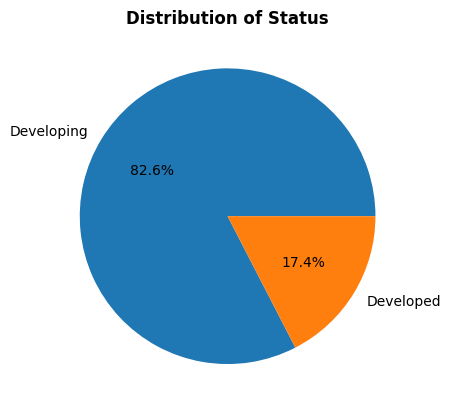

In [7]:
import matplotlib.pyplot as plt

df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Status', fontweight='bold')
plt.ylabel('')
plt.show()

- Our target `Status` is highly imbalanced.
  
- Considering metrics like **F1-Score, Precision, Recall, and ROC-AUC** would be preferable over accuracy.

#### 1.4 Handling Missing Values

In [8]:
null_count = df.isnull().sum()[df.isnull().sum() > 0]
null_count

,0
Life Expectancy,10
Adult Mortality,10
Alcohol,194
Hepatitis B,553
Bmi,34
Polio,19
Total Expenditure,226
Diphtheria,19
GDP,448
Population,652


In [9]:
df.describe().round(2)

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


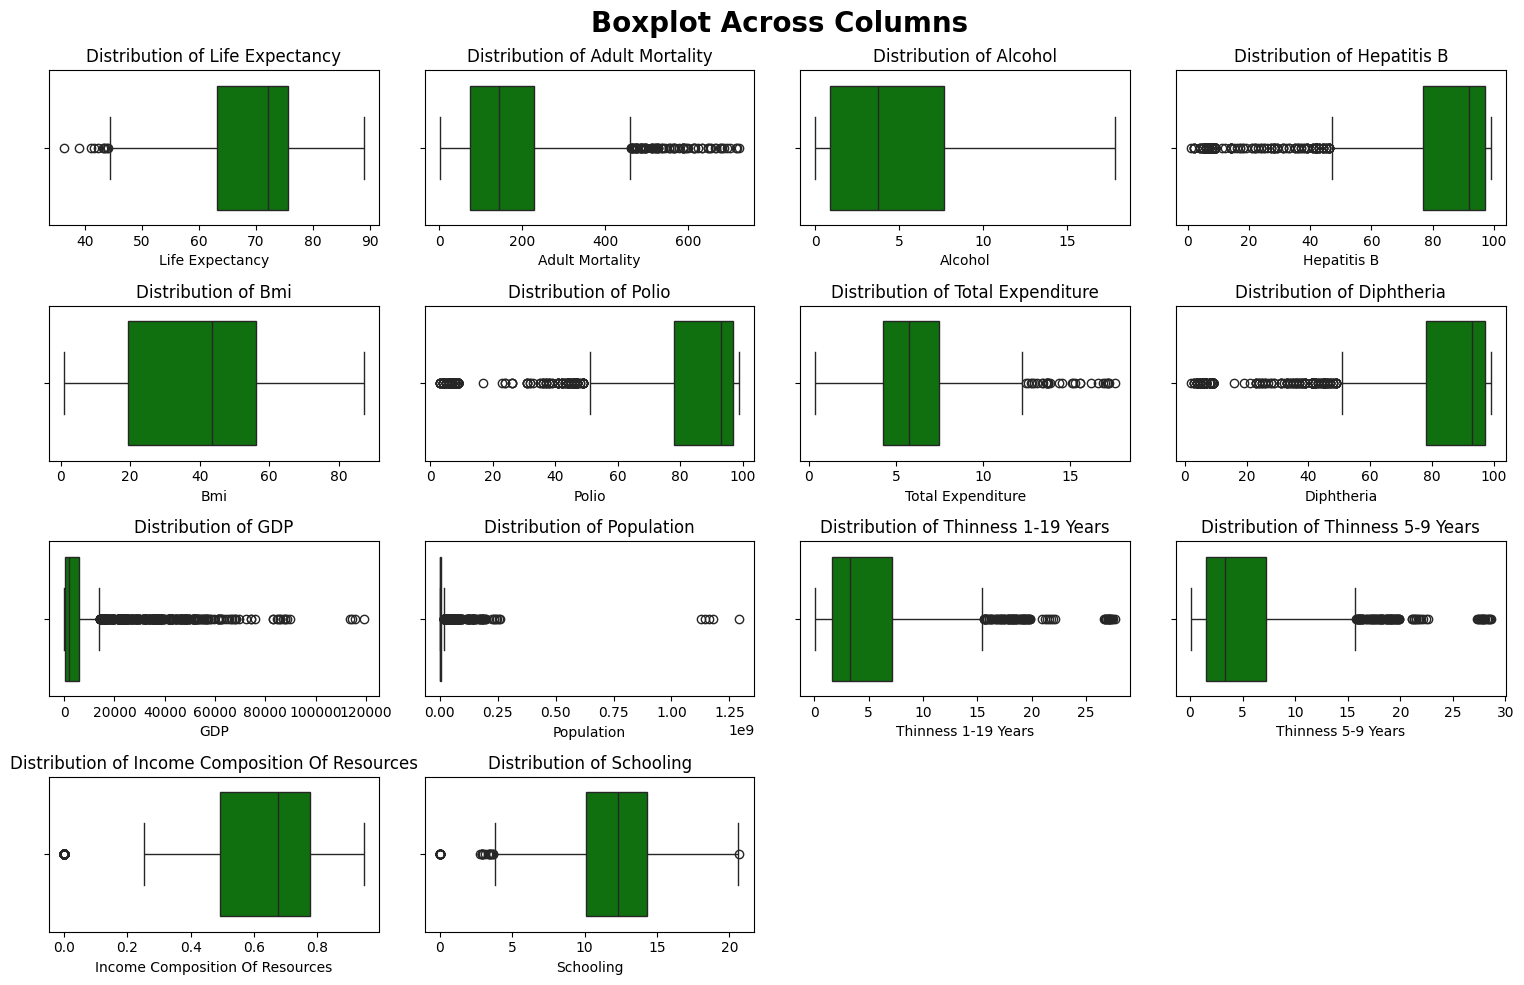

In [10]:
import seaborn as sns

fig, axes = plt.subplots(4, 4, figsize=(15, 10))
axes = axes.flatten()

for col, axis in zip(null_count.index.to_list(), axes):
    sns.boxplot(data=df, x=col, ax=axis, color='green')
    axis.set_title(f'Distribution of {col}')

for axis in axes[-2:]:
    axis.set_visible(False)

plt.suptitle('Boxplot Across Columns', fontsize='20', fontweight='bold')
plt.tight_layout()

In [11]:
print(f'Skewness Score:\n\n{df[null_count.index].skew()}')

Skewness Score:

Life Expectancy                    -0.638605
Adult Mortality                     1.174369
Alcohol                             0.589563
Hepatitis B                        -1.930845
Bmi                                -0.219312
Polio                              -2.098053
Total Expenditure                   0.618686
Diphtheria                         -2.072753
GDP                                 3.206655
Population                         15.916236
Thinness 1-19 Years                 1.711471
Thinness 5-9 Years                  1.777424
Income Composition Of Resources    -1.143763
Schooling                          -0.602437
dtype: float64


In [12]:
for col in null_count.index:
    if abs(df[col].skew()) < 0.5:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].median())

- The size of the dataset is low and this is a socio-economic dataset, extremely values are highly possible. So, treating them as outliers and removing those may leads to skew up out model predictions.
  
- As the numerical columns in the dataset **contain outliers and are highly skewed**, the `median()` is used for columns with high skewness **(skewness < -0.5 or skewness > 0.5)**, while the `mean()` is applied to columns with low skewness **(-0.5 ≤ skewness ≤ 0.5)**.
  
- From this our dataset is free from missing values.

#### 1.5 Exploratory Data Analysis

#### Univariate Analysis

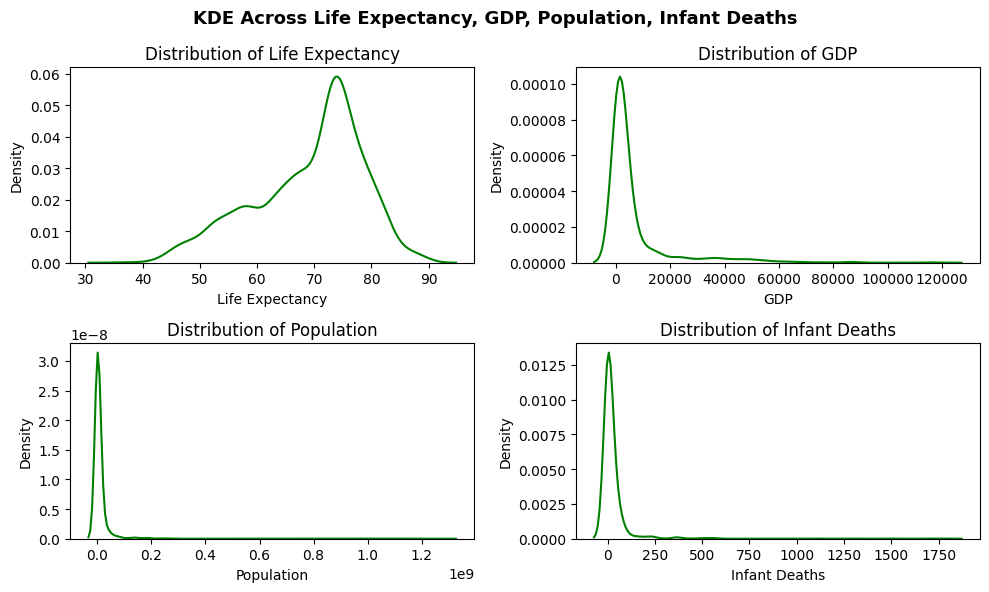

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for col, axis in zip(['Life Expectancy', 'GDP', 'Population', 'Infant Deaths'], axes):
    sns.kdeplot(data=df, x=col, ax=axis, color='green')
    axis.set_title(f'Distribution of {col}')

plt.suptitle('KDE Across Life Expectancy, GDP, Population, Infant Deaths', fontsize='13', fontweight='bold')
plt.tight_layout()
plt.show()

- The density plot clearly convey that average life of a human is in range 60 to 80 years.

- The `GDP` and `Population` is right skewed, shows that most of the countries have low `GDP` and high `Population`.

- The `Infant Deaths` are low is most of the countries but some countries have extreme high `Infant Deaths` so our data is right skewed.

#### Bivariate Analysis

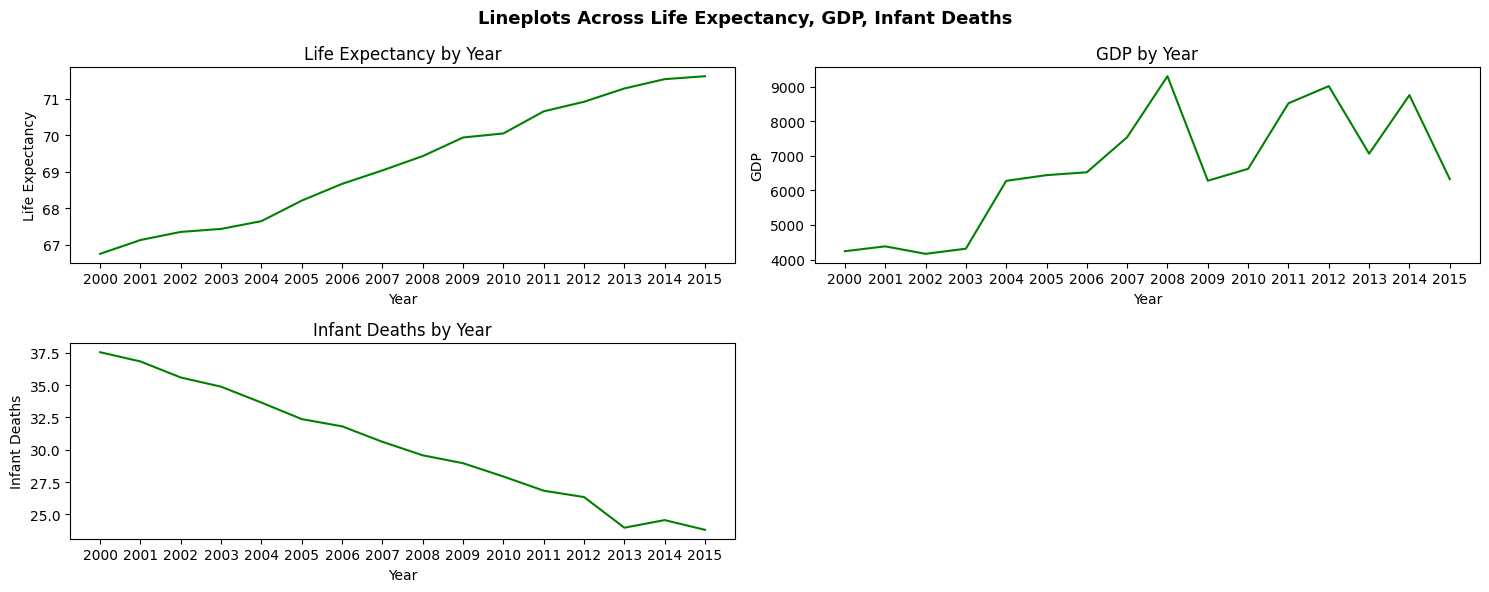

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes = axes.flatten()

for col, axis in zip(['Life Expectancy', 'GDP', 'Infant Deaths'], axes):
    sns.lineplot(data=df, x='Year', y=col, ax=axis, errorbar=None, color='green')
    axis.set_title(f'{col} by Year')
    axis.set_xticks(df['Year'].unique())

axes[-1].set_visible(False)
plt.suptitle('Lineplots Across Life Expectancy, GDP, Infant Deaths', fontsize='13', fontweight='bold')
plt.tight_layout()
plt.show()

- From the Line-Plot it is clear that `Life Expentency` is increasing year-on-year. This is generally a positive signal for the growth.

- `GDP` was increased significantly till the year of 2008. After that it's fluctuating. This may be due to the 2007 **economic crisis**.

- Even though the `GDP` is fluctuating after 2008, contries managed to reduce the `Infant Deaths`, and `Life Expentancy` is increased showing both are in positve trends.

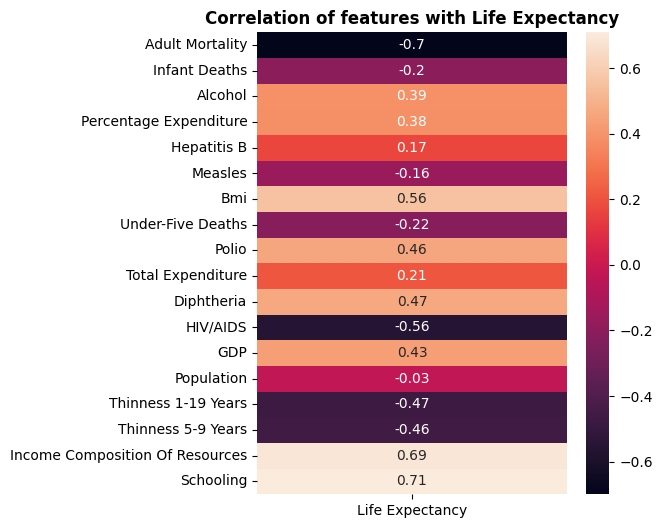

In [15]:
corr = df.drop(columns=['Status', 'Country', 'Year']).corr().drop('Life Expectancy').iloc[:, :1]
plt.figure(figsize=(5, 6))
sns.heatmap(corr.round(2), annot=True)
plt.title('Correlation of features with Life Expectancy', fontweight='bold')
plt.show()

- From the above heatmap it is clear that `Life Expectancy` is higly dependent on `Adult Mortality`, `Income Composition`, and `Schooling`.

- When `Adult Mortality` decreases, `Life Expectancy` increases (inverse relationship). `Income` is positivly correlated

- `Schooling` gives right knowledge to people about how to take care of there health and body. So, it has a high positve relationship with the `Life Expectancy`.

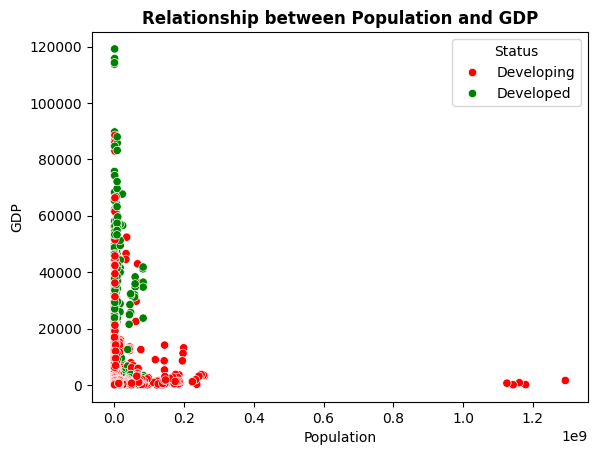

In [16]:
sns.scatterplot(data=df, x='Population', y='GDP', palette=['red', 'green'], hue='Status')
plt.title('Relationship between Population and GDP', fontweight='bold')
plt.show()

- The scatterplot above hued by `Status` shows that countries with low population has high Gross Domestic Product (GDP).

- Some contries have high GDP but still they are in developing stage.

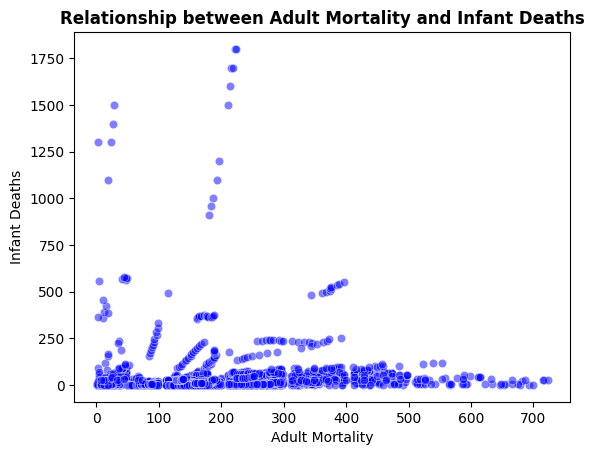

In [17]:
sns.scatterplot(data=df, x='Adult Mortality', y='Infant Deaths', color='blue', alpha=0.5)
plt.title('Relationship between Adult Mortality and Infant Deaths', fontweight='bold')
plt.show()

- An increase in both adult and infant mortality suggests underlying issues related to the healthcare system, economic conditions, environmental factors, or social determinants of health.

- Increase is `Adult Mortality` increasing the `Infant Deaths` which means infants loosing there caretakers.

- Improvements needed in healthcare access, economic development, sanitation, nutrition, and disease prevention to address the root causes of high mortality.

In [18]:
from scipy.stats import f_oneway

f_stats, p_value = f_oneway(df[df['Status'] == 'Developed']['Life Expectancy'],
                            df[df['Status'] == 'Developing']['Life Expectancy'])

print(f"F-Statistic: {f_stats:.2f}\nP-value: {p_value:.2f}")

if p_value < 0.05:
    print('\nThere is a difference in Life Expectancy for Status.')
else:
    print('\nThere is no difference in Life Expectancy for Status.')

F-Statistic: 885.72
P-value: 0.00

There is a difference in Life Expectancy for Status.


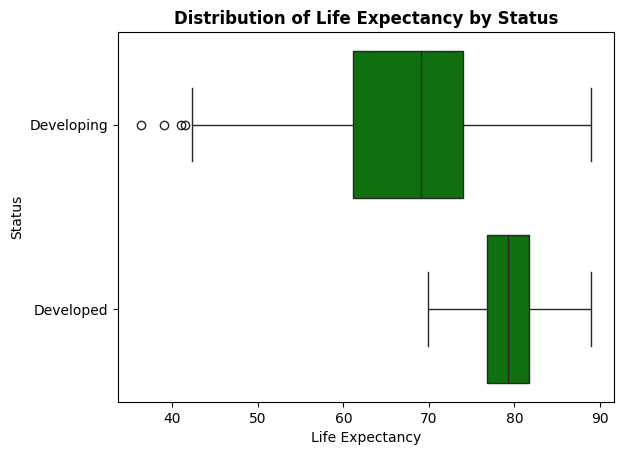

In [19]:
sns.boxplot(data=df, x='Life Expectancy', y='Status', color='green')
plt.title('Distribution of Life Expectancy by Status', fontweight='bold')
plt.show()

- The above distribution shows that `Life Expectancy` is generally higher in developed countries compared to developing ones. The `F-Statistical Test` provides evidence for this.

- The outliers in developing countries shows that, `Life Expectancy` is drastically low (35 years), which is very concerning.

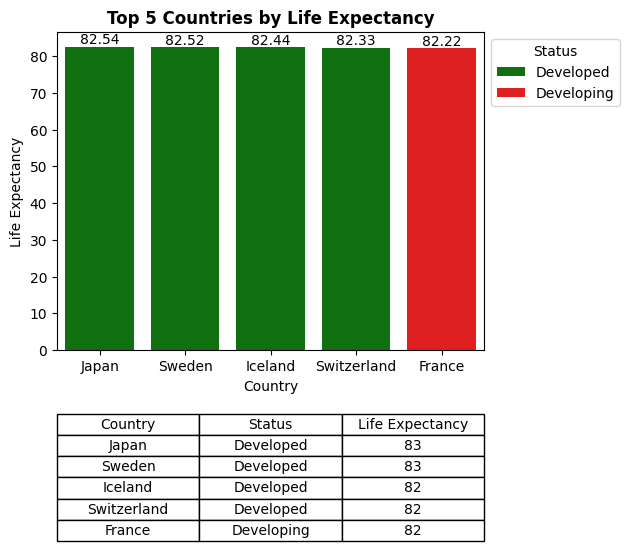

In [43]:
LE_top = df.groupby(['Country', 'Status'])['Life Expectancy'].mean().round(2).sort_values(ascending=False).head()

# Plot the barplot
ax = sns.barplot(data=LE_top.reset_index(), x='Country', y='Life Expectancy', hue='Status', palette=['green', 'red'])
for container in ax.containers: ax.bar_label(container)
plt.title('Top 5 Countries by Life Expectancy', fontweight='bold')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend outside the plot

# Create a table of the Life Expectancy data below the plot
table_data = LE_top.reset_index()[['Country', 'Status', 'Life Expectancy']]
table_data['Life Expectancy'] = table_data['Life Expectancy'].round(0).astype(int)
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  loc='bottom', cellLoc='center', colLoc='center',
                  bbox=[0, -0.6, 1, 0.4], fontsize=12)

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.show()

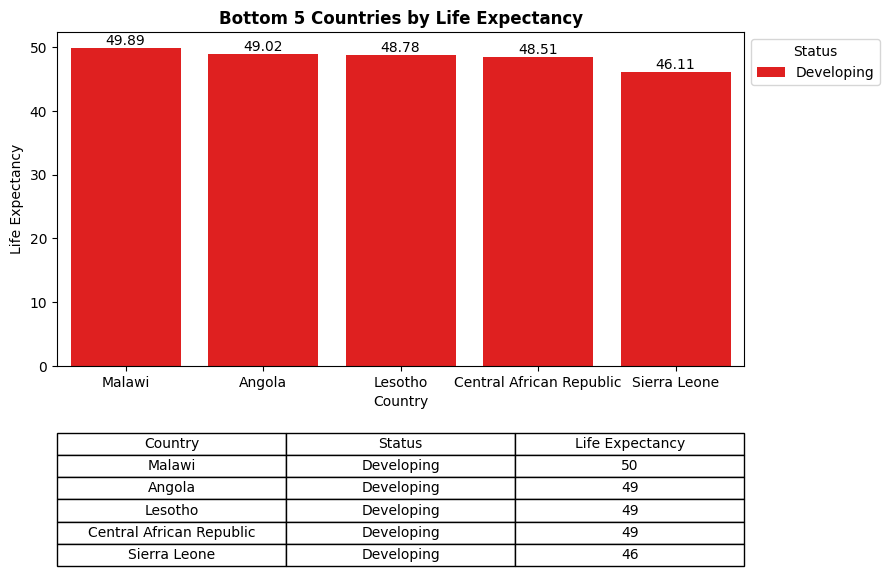

In [42]:
LE_bottom = df.groupby(['Country', 'Status'])['Life Expectancy'].mean().round(2).sort_values(ascending=False).tail()

# Plot the barplot
plt.figure(figsize=(9, 5))
ax = sns.barplot(data=LE_bottom.reset_index(), x='Country', y='Life Expectancy', hue='Status', palette=['red'])
for container in ax.containers: ax.bar_label(container)
plt.title('Bottom 5 Countries by Life Expectancy', fontweight='bold')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend outside the plot

# Create a table of the Life Expectancy data below the plot
table_data = LE_bottom.reset_index()[['Country', 'Status', 'Life Expectancy']]
table_data['Life Expectancy'] = table_data['Life Expectancy'].round(0).astype(int)
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  loc='bottom', cellLoc='center', colLoc='center',
                  bbox=[0, -0.6, 1, 0.4], fontsize=12)

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.show()

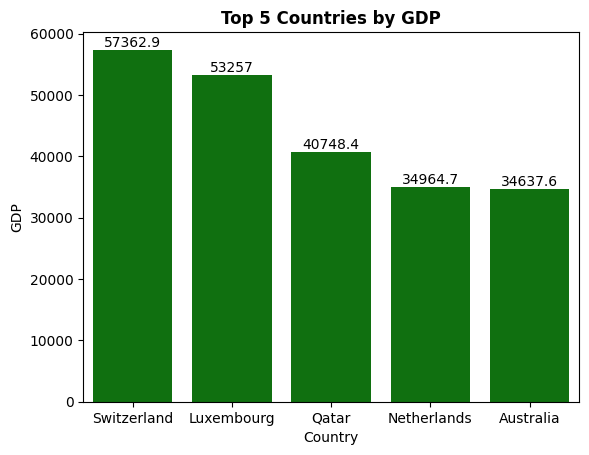

In [44]:
top_5 = df.groupby('Country')['GDP'].mean().round(2).sort_values(ascending=False).head()
ax = sns.barplot(data=top_5, order=top_5.index, color='green')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Countries by GDP', fontweight='bold')
plt.show()

- European Countries are top in terms of `GDP`.

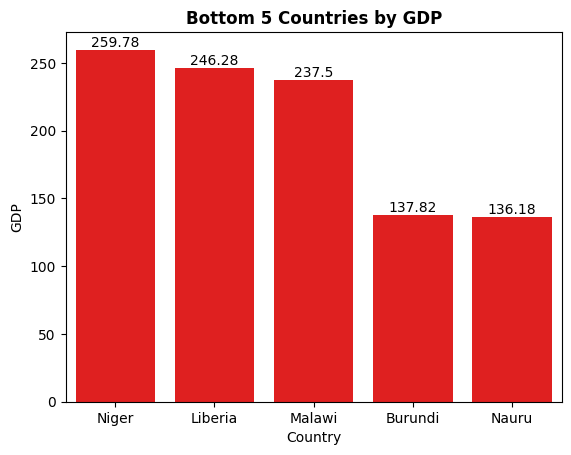

In [45]:
bottom_5 = df.groupby('Country')['GDP'].mean().round(2).sort_values(ascending=False).tail()
ax = sns.barplot(data=bottom_5, order=bottom_5.index, color='red')
ax.bar_label(ax.containers[0])
plt.title('Bottom 5 Countries by GDP', fontweight='bold')
plt.show()

- African Countries are the least in terms of `GDP`.

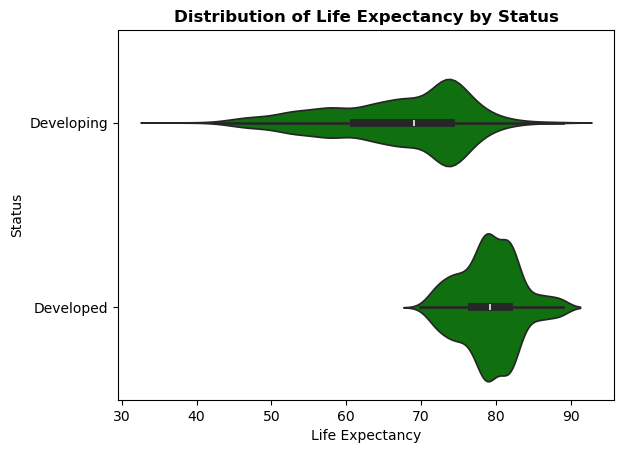

In [ ]:
sns.violinplot(data=df, x='Life Expectancy', y='Status', color='green')
plt.title('Distribution of Life Expectancy by Status', fontweight='bold')
plt.show()

- The violin plot shows that the distribution is **left skewed (negative skewness)** for Developing Countries and widly distributed.

- Whereas, Developed countries shows a **Gaussian Distribution (Normal Distribution)**.

In [46]:
from scipy.stats import spearmanr

disease = ['Hepatitis B', 'Measles', 'Bmi', 'Polio', 'Diphtheria', 'HIV/AIDS']
metrics = df.drop(columns=['Country', 'Year', 'Status', 'GDP', *disease]).columns
positive_corr = []
negative_corr = []

for column in metrics:
    corr, p_value = spearmanr(df[column], df['GDP'])
    if p_value < 0.05:
        if corr > 0:
            positive_corr.append(column)
        elif corr < 0:
            negative_corr.append(column)

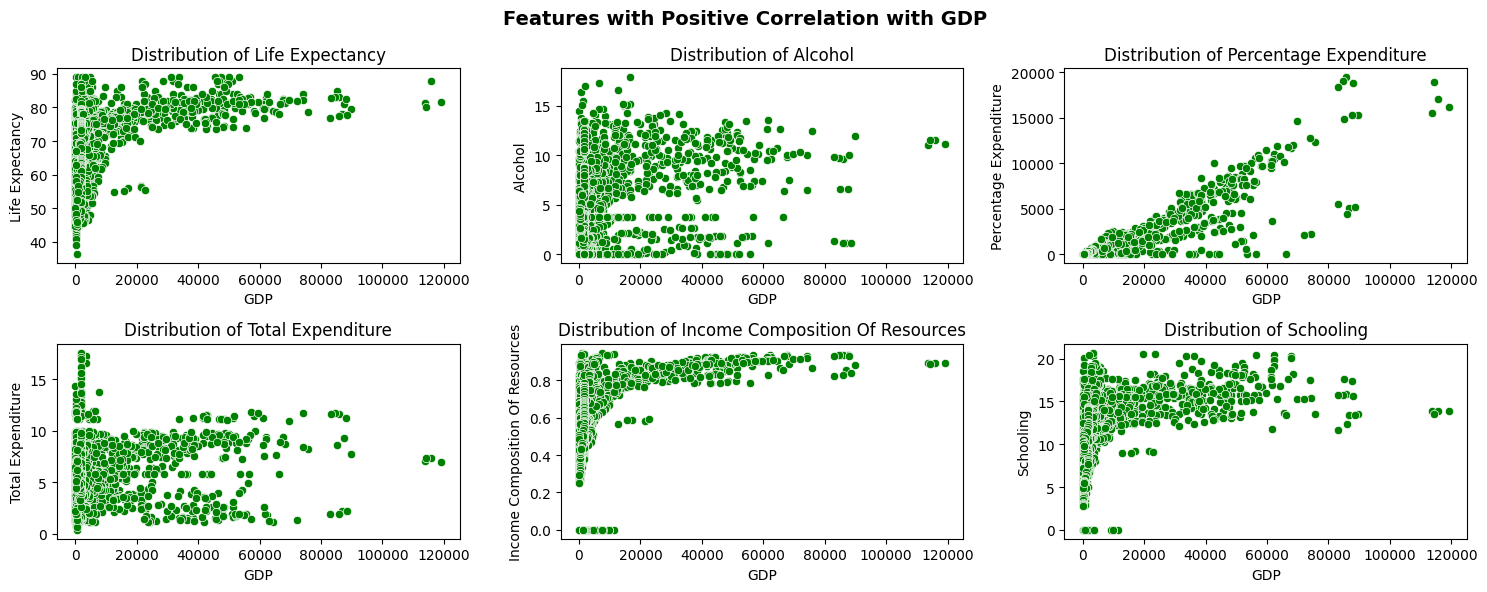

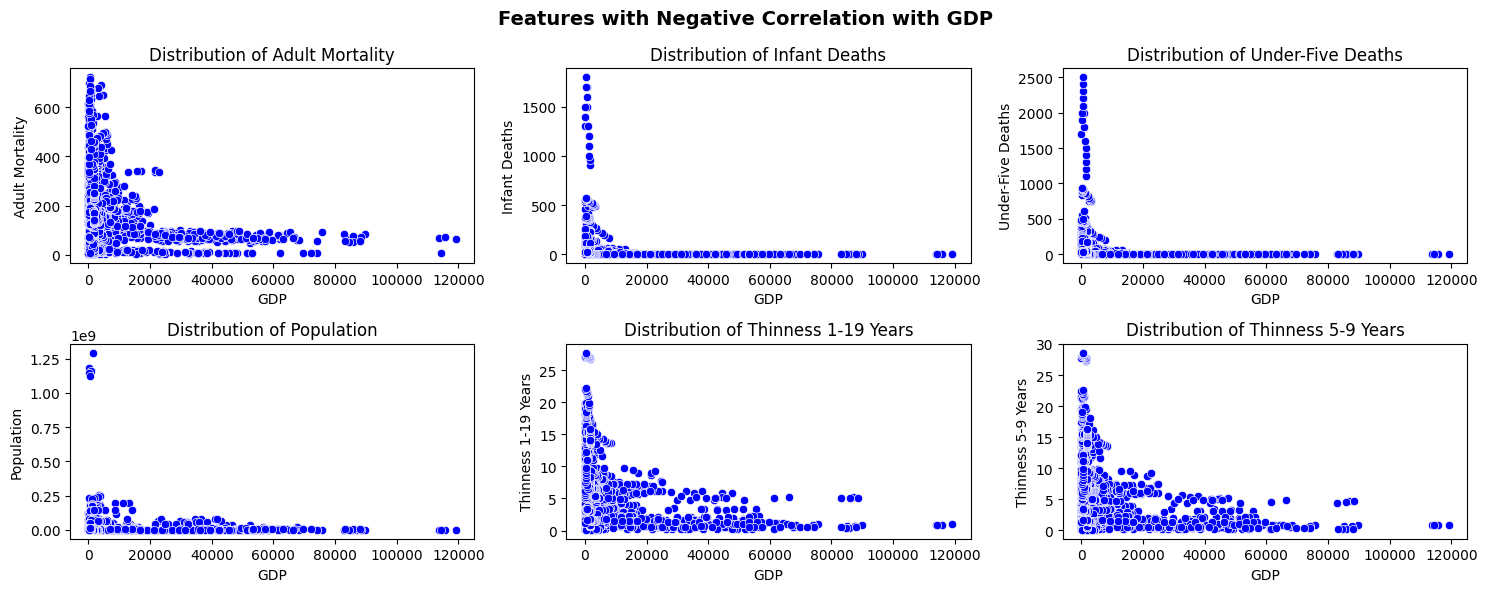

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for col, axis in zip(positive_corr, axes):
    sns.scatterplot(data=df, x='GDP', y=col, ax=axis, color='green')
    axis.set_title(f'Distribution of {col}')

plt.suptitle('Features with Positive Correlation with GDP', fontsize=14, fontweight='bold')
plt.tight_layout()

fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for col, axis in zip(negative_corr, axes):
    sns.scatterplot(data=df, x='GDP', y=col, ax=axis, color='blue')
    axis.set_title(f'Distribution of {col}')

plt.suptitle('Features with Negative Correlation with GDP', fontsize=14, fontweight='bold')
plt.tight_layout()

- The Statistical test and Scatter plot shows that, `GDP` increses with `Life Expectancy`, `Alcohol`, `Percentage Expenditure`, `Total Expenditure`, `Income Composition Of Resources`, `Schooling`.

- `GDP` decrease with `Adult Mortality`, `Infant Deaths`, `Under-Five Deaths`, `Population`, `Thinness 1-19 Years`, `Thinness 5-9 Years`.

- `GDP` is highly dependent on these features.

- Our dataset contains ouliers, higly skewed and doesn't follow Normal Distribution so I used `Spearman Correlation` Statistical test.

#### Multivariate Analysis

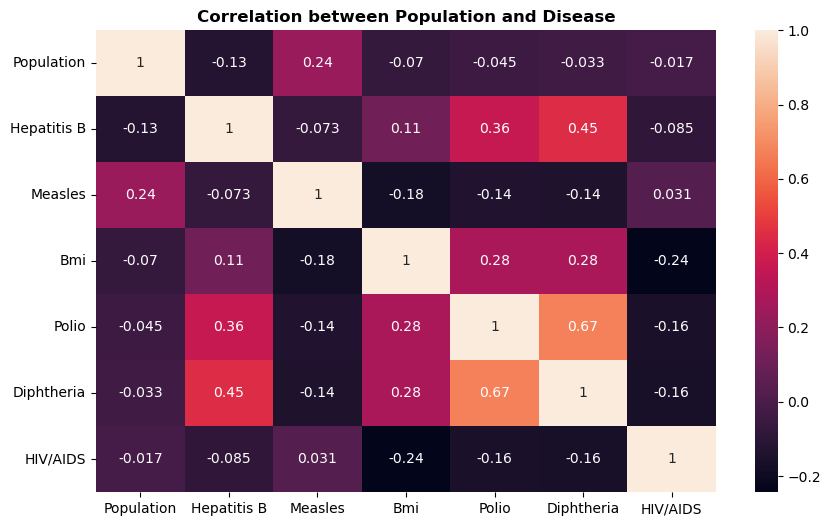

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df[['Population'] + disease].corr(), annot=True)
plt.title('Correlation between Population and Disease', fontweight='bold')
plt.show()

- The heatmap shows that, there is no correlation between the population and the diseases like **'Hepatitis B', 'Measles', 'Bmi', 'Polio', 'Diphtheria', 'HIV/AIDS'**.

- **'Polio'** and **'Diphtheria'** are slighly correlated while there is no biological interconnection, regions with lower immunization coverage for diphtheria might also have low coverage for polio, leading to co-occurrence of cases in poorly served communities.

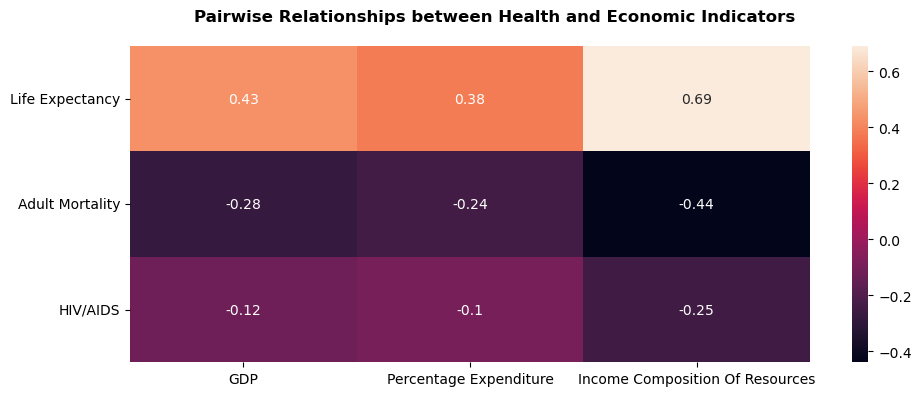

In [ ]:
corr = df[['Life Expectancy', 'Adult Mortality', 'HIV/AIDS',
            'GDP', 'Percentage Expenditure', 'Income Composition Of Resources']].corr().round(2).iloc[:3, 3:]
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True)
plt.suptitle('Pairwise Relationships between Health and Economic Indicators', fontweight='bold')
plt.tight_layout()
plt.show()

- `Life Expentancy` is dependent on `Income Composition Of Resources`.

- A low correlation for the rest does not mean that economic factors have no impact on health—it simply means that in this dataset, those factors may not be strongly related in a linear manner.

- On exploring non-linear models (e.g., decision trees, ensemble learning) we may capture better complex interactions between economic and health factors.

#### 1.6 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include='O').columns

for i in categorical_columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life Expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Bmi                              2938 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

### 2. Predicting Country Development `Status` using Classification Models

#### 2.1 Feature Selection

In [ ]:
X = df.drop(columns=['Status']) # features - independent variables
y = df['Status']    # target - dependent variables

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=8)
selector.fit_transform(X, y)
scores = selector.scores_

f_score = pd.DataFrame({
    'Features' : X.columns,
    'Scores' : scores.round(2)
        }).sort_values(by='Scores', ascending=False).reset_index(drop=True)
f_score

,Features,Scores
0,Alcohol,1485.74
1,Schooling,942.64
2,Life Expectancy,885.72
3,Income Composition Of Resources,790.94
4,Percentage Expenditure,763.38
5,GDP,728.96
6,Thinness 1-19 Years,453.60
7,Thinness 5-9 Years,448.93
8,Adult Mortality,323.17
9,Bmi,314.09


- As we have very less features considering all will be the right choice.

#### 2.2 Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

#### 2.3 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

to_scale = X_train.drop(columns=['Country', 'Year']).columns
scalar = StandardScaler()
X_train[to_scale] = scalar.fit_transform(X_train[to_scale]).round(3)
X_test[to_scale] = scalar.transform(X_test[to_scale]).round(3)

#### 2.4 Classification Model Building & Evaluation

#### Default Hyper-Parameter

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

clfs = {
    'Logistics Regression' : LogisticRegression(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Adaptive Boost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XGBoost' : XGBClassifier(),
    'Gaussian NB' : GaussianNB(),
    'SVC' : SVC()
}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

result = {}

for c_name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    result[c_name] = {'Accuracy' : accuracy, 'F1 Score' : f1}

dhp = pd.DataFrame(result).T
dhp

,Accuracy,F1 Score
Logistics Regression,0.936054,0.961507
K-Nearest Neighbors,0.965986,0.979855
Decision Tree,0.978231,0.986842
Random Forest,0.993197,0.995938
Adaptive Boost,0.975510,0.985270
Gradient Boosting,0.991837,0.995130
XGBoost,0.994558,0.996748
Gaussian NB,0.801361,0.866788
SVC,0.836735,0.911111


#### Tuned Hyper-Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    'Logistics Regression': {'max_iter': list(range(100, 300, 100))},
    'K-Nearest Neighbors': {'n_neighbors': list(range(5, 16))},
    'Decision Tree' : {'max_depth' : list(range(1, 11))},
    'Random Forest' : {'n_estimators' : list(range(50, 201, 50)), 'max_depth' : list(range(5, 21, 5))},
    'Adaptive Boost' : {'n_estimators' : list(range (50, 201, 50))},
    'Gradient Boosting' : {'n_estimators' : list(range(50, 301, 50))},
    'XGBoost' : {'n_estimators' : list(range(100, 1001, 100)), 'max_depth' : list(range(3, 8))},
    'Gaussian NB' : {'var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-6, 1e-4]},
    'SVC' : {'C': [1, 10], 'kernel' : ['rbf', 'linear']}
}

In [ ]:
from sklearn.metrics import f1_score

result = {}

for name, clf in clfs.items():
    print(f"\033[1m{name}\033[0m")

    if name == 'SVC':
        f1_svm = pd.DataFrame(columns=['C', 'Kernel', 'F1 Score'])

        for C in para_grid['SVC']['C']:
            for Kernel in para_grid['SVC']['kernel']:
                clf = SVC(C=C, kernel=Kernel)
                clf.fit(X_train, y_train)
                f1 = {'C' : C, 'Kernel' : Kernel, 'F1 Score' : f1_score(y_test, clf.predict(X_test))}
                f1_svm = pd.concat([f1_svm, pd.DataFrame([f1])], ignore_index=True)

        max_f1 = f1_svm['F1 Score'].max()
        best_para = f1_svm[f1_svm['F1 Score'] == max_f1][['C', 'Kernel']].to_dict(orient='records')

        print(f"Best Parameters : {best_para}")
        print(f"Best Cross-Validated Score : {max_f1}\n")

        result[name] = {'F1 Score' : max_f1}
        continue

    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=para_grid[name],
        scoring='f1',
        cv=3,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best Parameters : {grid_search.best_params_}")
    print(f"Best Cross-Validated Score : {grid_search.best_score_}\n")

    result[name] = {'F1 Score' : grid_search.best_score_}

thp = pd.DataFrame(result).T
thp

Logistics Regression
Best Parameters : {'max_iter': 200}
Best Cross-Validated Score : 0.9600185132870713

K-Nearest Neighbors
Best Parameters : {'n_neighbors': 5}
Best Cross-Validated Score : 0.9591538285417279

Decision Tree
Best Parameters : {'max_depth': 8}
Best Cross-Validated Score : 0.9840002114619351

Random Forest
Best Parameters : {'max_depth': 15, 'n_estimators': 100}
Best Cross-Validated Score : 0.9917282155219574

Adaptive Boost
Best Parameters : {'n_estimators': 100}
Best Cross-Validated Score : 0.9875897466170339

Gradient Boosting
Best Parameters : {'n_estimators': 300}
Best Cross-Validated Score : 0.9922882783757965

XGBoost
Best Parameters : {'max_depth': 4, 'n_estimators': 1000}
Best Cross-Validated Score : 0.9950471955737855

Gaussian NB
Best Parameters : {'var_smoothing': 1e-09}
Best Cross-Validated Score : 0.8685287973327913

SVC
Best Parameters : [{'C': 1, 'Kernel': 'linear'}]
Best Cross-Validated Score : 0.9629629629629629



,F1 Score
Logistics Regression,0.960019
K-Nearest Neighbors,0.959154
Decision Tree,0.984000
Random Forest,0.991728
Adaptive Boost,0.987590
Gradient Boosting,0.992288
XGBoost,0.995047
Gaussian NB,0.868529
SVC,0.962963


#### 2.5 Performance Reporting

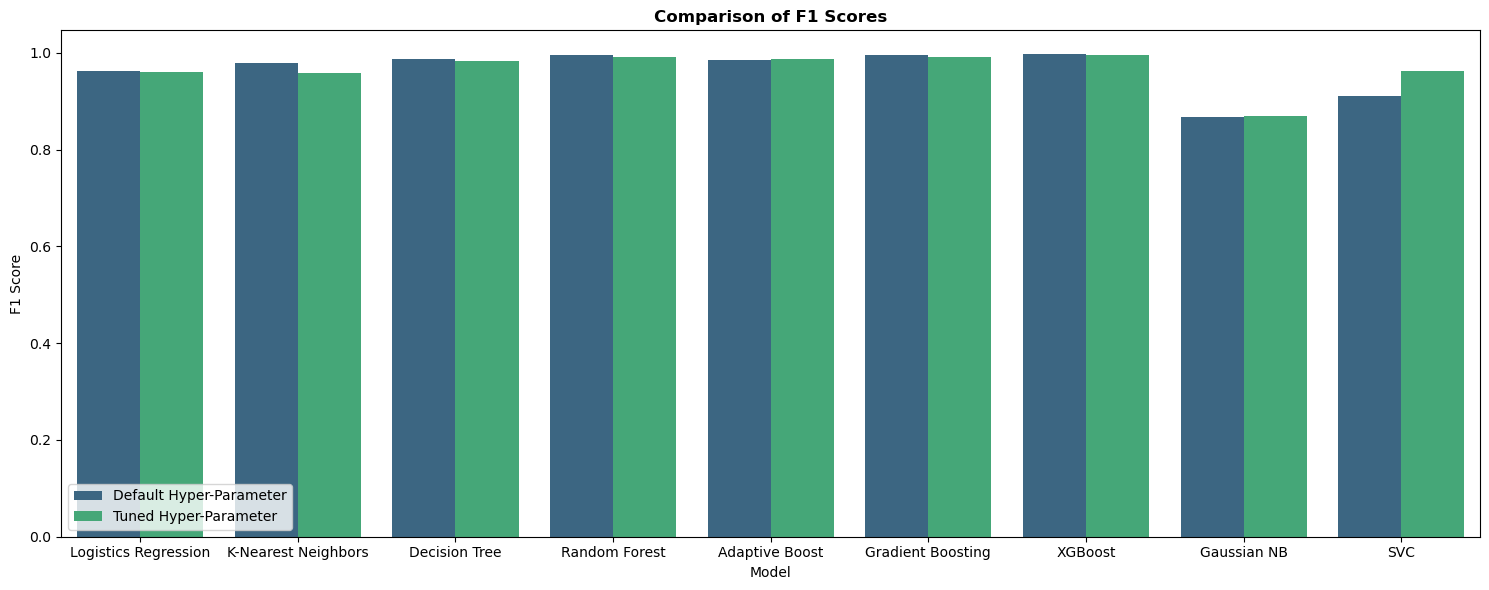

In [ ]:
dhp['Source'] = 'Default Hyper-Parameter'
thp['Source'] = 'Tuned Hyper-Parameter'

concat = pd.concat([dhp, thp])

plt.figure(figsize=(15, 6))
sns.barplot(data=concat, x=concat.index, y="F1 Score", hue="Source", palette='viridis')
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.title("Comparison of F1 Scores", fontweight='bold')
plt.legend(loc='lower left')
plt.tight_layout()

- From the above barplot it is clear that `XGBoost` is performing well than other model.

### 3. Predicting `Life Expectancy` Using Regression Models

#### 3.1 Feature Selection

In [ ]:
X = df.drop(columns='Life Expectancy')
y = df['Life Expectancy']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=8)
selector.fit_transform(X, y)
scores = selector.scores_

f_score = pd.DataFrame({
    'Features' : X.columns,
    'Scores' : scores.round(2)
        }).sort_values(by='Scores', ascending=False).reset_index(drop=True)
f_score

,Features,Scores
0,Schooling,3036.89
1,Adult Mortality,2764.52
2,Income Composition Of Resources,2648.45
3,Bmi,1344.55
4,HIV/AIDS,1318.57
5,Status,885.72
6,Diphtheria,842.55
7,Thinness 1-19 Years,823.41
8,Thinness 5-9 Years,798.81
9,Polio,781.07


#### 3.2 Spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### 3.3 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

to_scale = X_train.drop(columns='Status').columns
scalar = StandardScaler()
X_train[to_scale] = scalar.fit_transform(X_train[to_scale]).round(3)
X_test[to_scale] = scalar.transform(X_test[to_scale]).round(3)

#### 3.4 Regression Model Building & Evaluation

#### Default Hyper-Parameter

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

clfs = {
    'Linear' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state=42),
    'KNR' : KNeighborsRegressor(),
    'Random Forest' : RandomForestRegressor(random_state=42),
    'Gradient Boost' : GradientBoostingRegressor(random_state=42),
    'AdaBoost' : AdaBoostRegressor(random_state=42),
    'XGR' : XGBRegressor(),
    'SVR' : SVR()
}

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

result = {}

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    r2 = r2_score(y_test, clf.predict(X_test))
    mae = mean_absolute_error(y_test, clf.predict(X_test))
    result[name] = {'R2' : r2, 'MAE' : mae}

dhp = pd.DataFrame(result).T
dhp

,R2,MAE
Linear,0.817634,2.942293
Decision Tree,0.932999,1.520952
KNR,0.915150,1.867293
Random Forest,0.965404,1.115758
Gradient Boost,0.951228,1.528183
AdaBoost,0.895966,2.445151
XGR,0.969508,1.123103
SVR,0.862771,2.423606


#### Tuned Hyper-Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    'KNR': {'n_neighbors': list(range(5, 16))},
    'Decision Tree' : {'max_depth' : list(range(1, 11))},
    'Random Forest' : {'n_estimators' : list(range(50, 201, 50)), 'max_depth' : list(range(5, 21, 5))},
    'AdaBoost' : {'n_estimators' : list(range (50, 201, 50))},
    'Gradient Boost' : {'n_estimators' : list(range(50, 301, 50))},
    'XGR' : {'n_estimators' : list(range(100, 1001, 100)), 'max_depth' : list(range(3, 8))},
    'SVR' : {'C': [1, 10], 'kernel' : ['rbf', 'linear']}
}

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer

result = {}
scoring = {
    'R2' : 'r2',
    'MAE' : make_scorer(mean_absolute_error, greater_is_better=False)
}

for name, clf in clfs.items():

    if name == 'Linear':
        result[name] = {'R2 Score' : dhp['R2'][0], 'MAE' : dhp['MAE'][0]}
        continue

    print(f"\033[1m{name}\033[0m")

    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=para_grid[name],
        scoring=scoring,
        refit='R2',
        cv=3,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best Parameters : {grid_search.best_params_}")
    print(f"Best R2 Score: {grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]}")
    print(f"Best MAE Score: {abs(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_])}\n")

    result[name] = {
        'R2 Score' : grid_search.cv_results_['mean_test_R2'][grid_search.best_index_],
        'MAE' : grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]
    }

thp = pd.DataFrame(result).T
thp

Decision Tree
Best Parameters : {'max_depth': 8}
Best R2 Score: 0.9016235979086744
Best MAE Score: 1.972099335666604

KNR
Best Parameters : {'n_neighbors': 5}
Best R2 Score: 0.8807215326314332
Best MAE Score: 2.330726982891249

Random Forest
Best Parameters : {'max_depth': 20, 'n_estimators': 200}
Best R2 Score: 0.9497059358153125
Best MAE Score: 1.333205692780698

Gradient Boost
Best Parameters : {'n_estimators': 300}
Best R2 Score: 0.9497837680126323
Best MAE Score: 1.444970504576343

AdaBoost
Best Parameters : {'n_estimators': 100}
Best R2 Score: 0.8957670854533747
Best MAE Score: 2.4163521324598563

XGR
Best Parameters : {'max_depth': 6, 'n_estimators': 400}
Best R2 Score: 0.950867671238905
Best MAE Score: 1.3586963418988631

SVR
Best Parameters : {'C': 10, 'kernel': 'rbf'}
Best R2 Score: 0.9108011909002606
Best MAE Score: 1.857047954997128



,R2 Score,MAE
Linear,0.817634,2.942293
Decision Tree,0.901624,-1.972099
KNR,0.880722,-2.330727
Random Forest,0.949706,-1.333206
Gradient Boost,0.949784,-1.444971
AdaBoost,0.895767,-2.416352
XGR,0.950868,-1.358696
SVR,0.910801,-1.857048


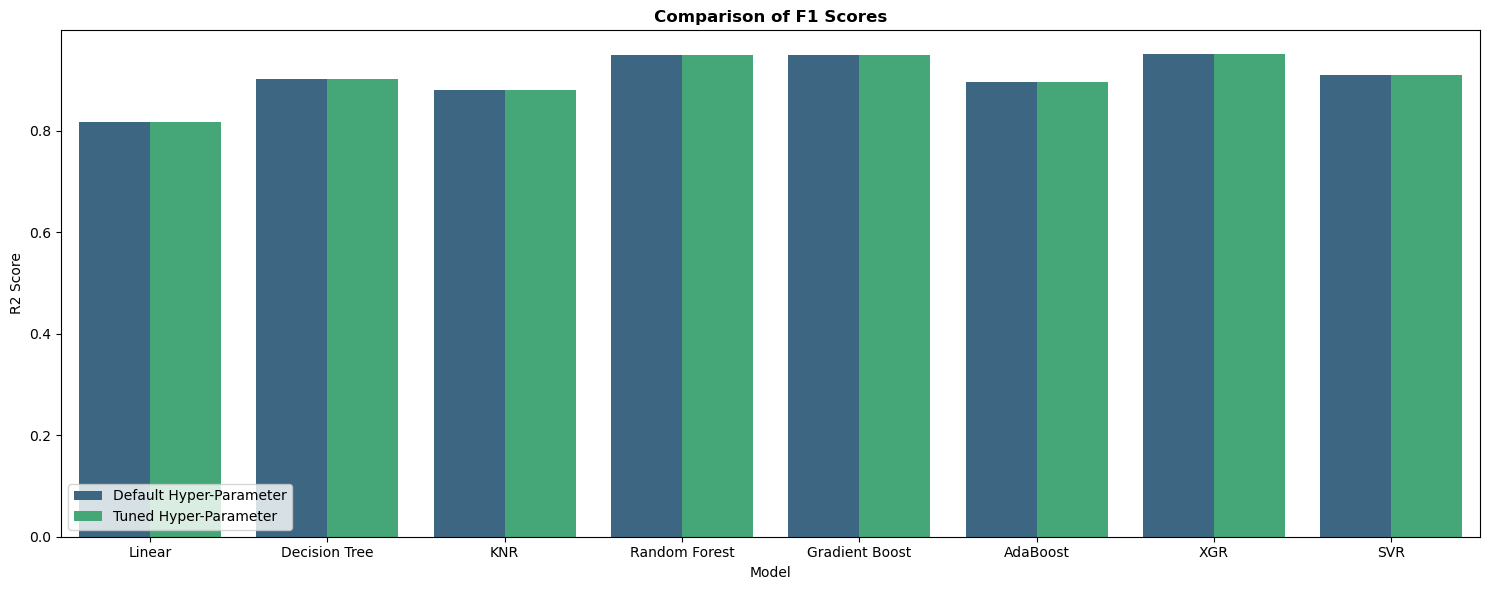

In [ ]:
dhp['Source'] = 'Default Hyper-Parameter'
thp['Source'] = 'Tuned Hyper-Parameter'

concat = pd.concat([dhp, thp])

plt.figure(figsize=(15, 6))
sns.barplot(data=concat, x=concat.index, y="R2 Score", hue="Source", palette='viridis')
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.title("Comparison of F1 Scores", fontweight='bold')
plt.legend(loc='lower left')
plt.tight_layout()

- From the above bar plot, `Random Forest`, `Gradient Boost`, and `XGR` have R2 Scores are very close and are great fit for this dataset.

- But, `XGR` is preferable as it slightly outperformed than other models.